In [791]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc


In [792]:
depress_df = pd.read_csv("../datasets/Student Depression Dataset.csv")
depress_df.sample(5)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
5672,28565,Male,28.0,Meerut,Student,5.0,0.0,6.29,1.0,0.0,7-8 hours,Unhealthy,Class 12,No,2.0,2.0,No,1
18316,92738,Male,19.0,Agra,Student,4.0,0.0,8.21,1.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,11.0,2.0,No,1
6886,34581,Female,25.0,Jaipur,Student,2.0,0.0,7.53,3.0,0.0,5-6 hours,Moderate,PhD,Yes,11.0,3.0,Yes,0
16288,82435,Male,26.0,Lucknow,Student,3.0,0.0,9.86,4.0,0.0,5-6 hours,Unhealthy,M.Com,Yes,1.0,4.0,No,1
25003,125966,Female,18.0,Indore,Student,4.0,0.0,6.78,2.0,0.0,7-8 hours,Moderate,Class 12,Yes,3.0,5.0,Yes,1


https://www.kaggle.com/datasets/hopesb/student-depression-dataset

In [793]:
depress_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [794]:
depress_df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [795]:
depress_df["Financial Stress"] = depress_df["Financial Stress"].fillna(depress_df["Financial Stress"].mean())

In [796]:
depress_df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [797]:
depress_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,27901.0,70442.149421,40641.175216,2.0,35039.00,70684.00,105818.00,140699.0
Age,27901.0,25.822300,4.905687,18.0,21.00,25.00,30.00,59.0
Academic Pressure,27901.0,3.141214,1.381465,0.0,2.00,3.00,4.00,5.0
Work Pressure,27901.0,0.000430,0.043992,0.0,0.00,0.00,0.00,5.0
CGPA,27901.0,7.656104,1.470707,0.0,6.29,7.77,8.92,10.0
Study Satisfaction,27901.0,2.943837,1.361148,0.0,2.00,3.00,4.00,5.0
Job Satisfaction,27901.0,0.000681,0.044394,0.0,0.00,0.00,0.00,4.0
Work/Study Hours,27901.0,7.156984,3.707642,0.0,4.00,8.00,10.00,12.0
Financial Stress,27901.0,3.139867,1.437269,1.0,2.00,3.00,4.00,5.0
Depression,27901.0,0.585499,0.492645,0.0,0.00,1.00,1.00,1.0


In [798]:
depress_df.describe(include='object').T

,count,unique,top,freq
Gender,27901,2,Male,15547
City,27901,52,Kalyan,1570
Profession,27901,14,Student,27870
Sleep Duration,27901,5,Less than 5 hours,8310
Dietary Habits,27901,4,Unhealthy,10317
Degree,27901,28,Class 12,6080
Have you ever had suicidal thoughts ?,27901,2,Yes,17656
Family History of Mental Illness,27901,2,No,14398


In [799]:
vc = depress_df['City'].value_counts()
mask_vals = vc[vc < 100].index 
depress_df['City'] = depress_df['City'].replace(mask_vals, 'Other')

In [800]:
depress_df['City'].nunique()

31

In [801]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(depress_df['City'], depress_df['Depression'])

# Тест
chi2_stat, p, dof, expected = chi2_contingency(contingency_table)

print("Chi2 statistic:", chi2_stat)
print("p-value:", p)
print("Степени свободы:", dof)

if p < 0.05:
    print("Переменная значима")
else:
    print("Переменная НЕ значима")

Chi2 statistic: 165.90689060399185
p-value: 9.464414062060919e-21
Степени свободы: 30
Переменная значима


Hyderabad        0.038255
Ahmedabad        0.033356
Patna            0.018100
Rajkot           0.014349
Bhopal           0.013001
Kolkata          0.009434
Delhi            0.008154
Bangalore        0.007975
Indore           0.006073
Kalyan           0.004662
Meerut           0.004279
Chennai          0.004082
Thane            0.002249
Faridabad        0.000619
Other           -0.000532
Ludhiana        -0.001298
Surat           -0.002328
Ghaziabad       -0.003699
Vasai-Virar     -0.005645
Visakhapatnam   -0.006099
Vadodara        -0.007631
Nagpur          -0.008752
Pune            -0.010242
Mumbai          -0.010830
Lucknow         -0.012874
Kanpur          -0.013229
Srinagar        -0.013561
Nashik          -0.016408
Varanasi        -0.017426
Agra            -0.020817
Jaipur          -0.024462
dtype: float64


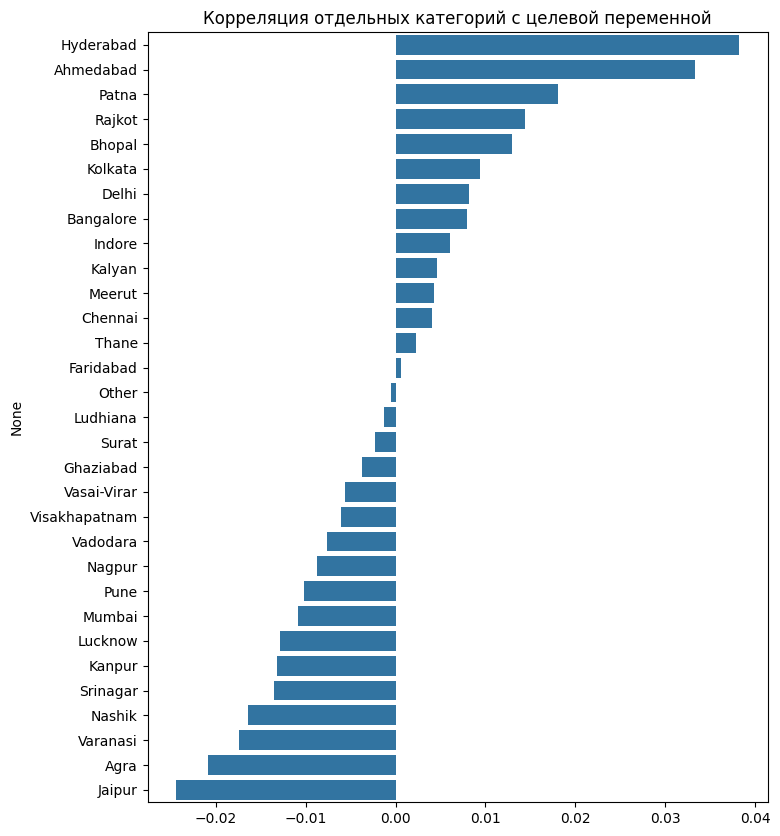

In [802]:
import pandas as pd
dummies = pd.get_dummies(depress_df['City'])
correlations = dummies.corrwith(depress_df['Depression']).sort_values(ascending=False)
print(correlations)
plt.figure(figsize=(8, 10))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Корреляция отдельных категорий с целевой переменной')
plt.show()

In [803]:
depress_df['Profession'].value_counts()

Profession
Student                   27870
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [804]:
depress_df['Degree'].value_counts()

Degree
Class 12    6080
B.Ed        1867
B.Com       1506
B.Arch      1478
BCA         1433
MSc         1190
B.Tech      1152
MCA         1044
M.Tech      1022
BHM          925
BSc          888
M.Ed         821
B.Pharm      810
M.Com        734
MBBS         696
BBA          696
LLB          671
BE           613
BA           600
M.Pharm      582
MD           572
MBA          562
MA           544
PhD          522
LLM          482
MHM          191
ME           185
Others        35
Name: count, dtype: int64

In [805]:
depress_df.groupby('Degree')['Depression'].value_counts(normalize=True).unstack()

Depression,0,1
Degree,,
B.Arch,0.410690,0.589310
B.Com,0.433599,0.566401
B.Ed,0.453133,0.546867
B.Pharm,0.471605,0.528395
B.Tech,0.431424,0.568576
BA,0.465000,0.535000
BBA,0.415230,0.584770
BCA,0.428472,0.571528
BE,0.455139,0.544861


In [806]:
depress_df['Degree'].nunique()

28

In [807]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(depress_df['Degree'], depress_df['Depression'])

# Тест
chi2_stat, p, dof, expected = chi2_contingency(contingency_table)

print("Chi2 statistic:", chi2_stat)
print("p-value:", p)
print("Степени свободы:", dof)

if p < 0.05:
    print("Переменная значима")
else:
    print("Переменная НЕ значима")

Chi2 statistic: 531.3556880193652
p-value: 5.125450008521483e-95
Степени свободы: 27
Переменная значима


Class 12    0.130970
B.Arch      0.001830
BSc         0.001275
Others      0.001043
BBA        -0.000237
MBBS       -0.001636
MSc        -0.006388
BCA        -0.006599
B.Tech     -0.007129
ME         -0.009249
B.Com      -0.009260
PhD        -0.010540
MHM        -0.011321
BE         -0.012364
LLM        -0.012960
BHM        -0.013242
MBA        -0.013490
M.Pharm    -0.013623
MA         -0.015002
BA         -0.015196
LLB        -0.017509
M.Com      -0.018072
MD         -0.018948
MCA        -0.020034
B.Pharm    -0.020043
B.Ed       -0.021000
M.Ed       -0.028282
M.Tech     -0.029969
dtype: float64


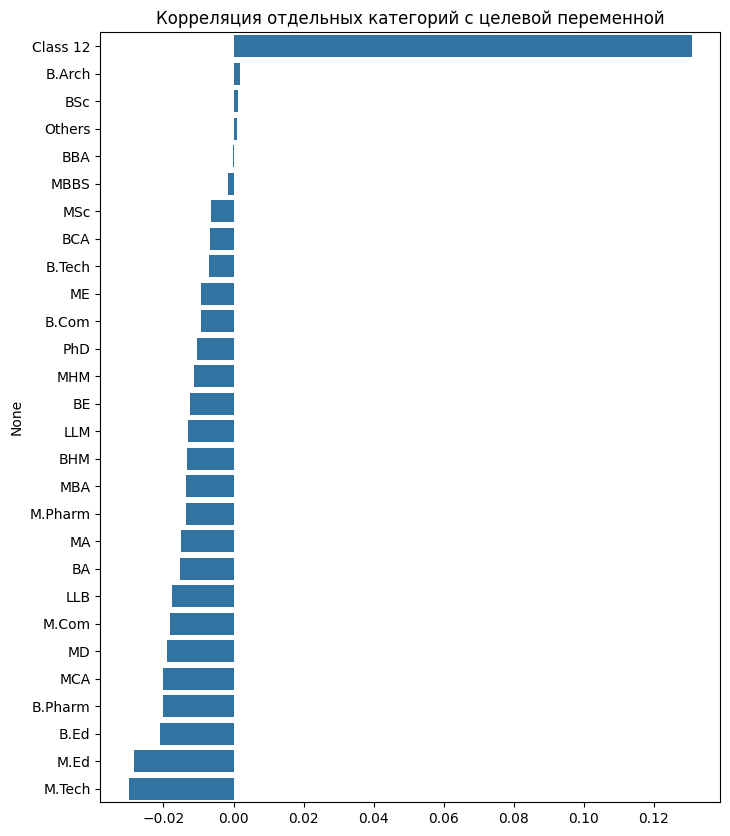

In [808]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dummies = pd.get_dummies(depress_df['Degree'])


correlations = dummies.corrwith(depress_df['Depression']).sort_values(ascending=False)

print(correlations)


plt.figure(figsize=(8, 10))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Корреляция отдельных категорий с целевой переменной')
plt.show()

In [809]:
depress_df['HigherDegree'] = depress_df['Degree'] != 'Class 12'
depress_df['HigherDegree'].replace({'True': 1, 'False': 0}, inplace=True)

C:\Users\ilchu\AppData\Local\Temp\ipykernel_22872\300208757.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  depress_df['HigherDegree'].replace({'True': 1, 'False': 0}, inplace=True)


In [810]:
depress_df['HigherDegree'].value_counts()

HigherDegree
True     21821
False     6080
Name: count, dtype: int64

In [811]:
depress_df['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    8310
7-8 hours            7346
5-6 hours            6183
More than 8 hours    6044
Others                 18
Name: count, dtype: int64

In [812]:
depress_df['Sleep Duration'] = depress_df['Sleep Duration'].replace({'Others':depress_df['Sleep Duration'].mode()[0]})

In [813]:
num_cols = depress_df.select_dtypes(include=["number"]).columns
num_cols

Index(['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress', 'Depression'],
      dtype='object')

In [814]:
cat_cols = depress_df.select_dtypes('object').columns
cat_cols

Index(['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')

In [815]:
cols_to_drop = ['id', 'City', 'Degree','Depression', 'Profession']
X = depress_df.drop(cols_to_drop, axis=1)  # Удаляем таргет
y = depress_df['Depression']

In [816]:
cat_cols = X.select_dtypes('object').columns
num_cols = X.select_dtypes(include=["number"]).columns

In [817]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cat_cols),
        ('num', StandardScaler(), num_cols),
    ], remainder='passthrough')

In [818]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [819]:
rf_gini = RandomForestClassifier(n_estimators= 100,
                            bootstrap=True,
                            criterion='gini',
                            max_features='sqrt',
                            n_jobs=-1, 
                            random_state=0)


In [820]:
rf_gini_pipeline = make_pipeline(preprocessor, rf_gini)
rf_gini_pipeline.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [821]:
# извлекаем имена признаков после one-hot кодирования
ct = rf_gini_pipeline.named_steps['columntransformer']
ohe = ct.named_transformers_['cat']
ohe_names = list(ohe.get_feature_names_out(cat_cols))
feature_names = num_cols.to_list() + ohe_names + ['HigherDegree']

# извлекаем важности признаков
importances = rf_gini_pipeline.named_steps['randomforestclassifier'].feature_importances_
feat_imp_gini = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp_gini = feat_imp_gini.sort_values('importance', ascending=False).reset_index(drop=True)

# топ-20 признаков
feat_imp_gini.head(20)

,feature,importance
0,Dietary Habits_Moderate,0.160083
1,Sleep Duration_7-8 hours,0.135969
2,Sleep Duration_5-6 hours,0.117383
3,Dietary Habits_Unhealthy,0.109163
4,Dietary Habits_Healthy,0.096522
5,Family History of Mental Illness_Yes,0.094246
6,Family History of Mental Illness_No,0.087468
7,Have you ever had suicidal thoughts ?_No,0.054433
8,Gender_Male,0.018555
9,Work/Study Hours,0.012625


In [822]:
rf_entropy = RandomForestClassifier(n_estimators= 100,
                            bootstrap=True,
                            criterion='entropy',
                            max_features='sqrt',
                            n_jobs=-1, 
                            random_state=0)

rf_entropy_pipeline = make_pipeline(preprocessor, rf_entropy)
rf_entropy_pipeline.fit(X_train, y_train)

# извлекаем имена признаков после one-hot кодирования
ct = rf_entropy_pipeline.named_steps['columntransformer']
ohe = ct.named_transformers_['cat']
ohe_names = list(ohe.get_feature_names_out(cat_cols))
feature_names = num_cols.to_list() + ohe_names + ['HigherDegree']

# извлекаем важности признаков
importances = rf_entropy_pipeline.named_steps['randomforestclassifier'].feature_importances_
feat_imp_entropy = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp_entropy = feat_imp_entropy.sort_values('importance', ascending=False).reset_index(drop=True)

# топ-20 признаков
feat_imp_entropy.head(20)

,feature,importance
0,Dietary Habits_Moderate,0.153646
1,Dietary Habits_Unhealthy,0.120834
2,Sleep Duration_7-8 hours,0.115517
3,Dietary Habits_Healthy,0.104643
4,Family History of Mental Illness_Yes,0.097921
5,Family History of Mental Illness_No,0.095572
6,Sleep Duration_5-6 hours,0.089044
7,Have you ever had suicidal thoughts ?_No,0.061213
8,Gender_Male,0.018278
9,Study Satisfaction,0.013984


In [823]:
y_pred = rf_gini_pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[1838  505]
 [ 435 2803]]


In [824]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      2343
           1       0.85      0.87      0.86      3238

    accuracy                           0.83      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.83      0.83      0.83      5581



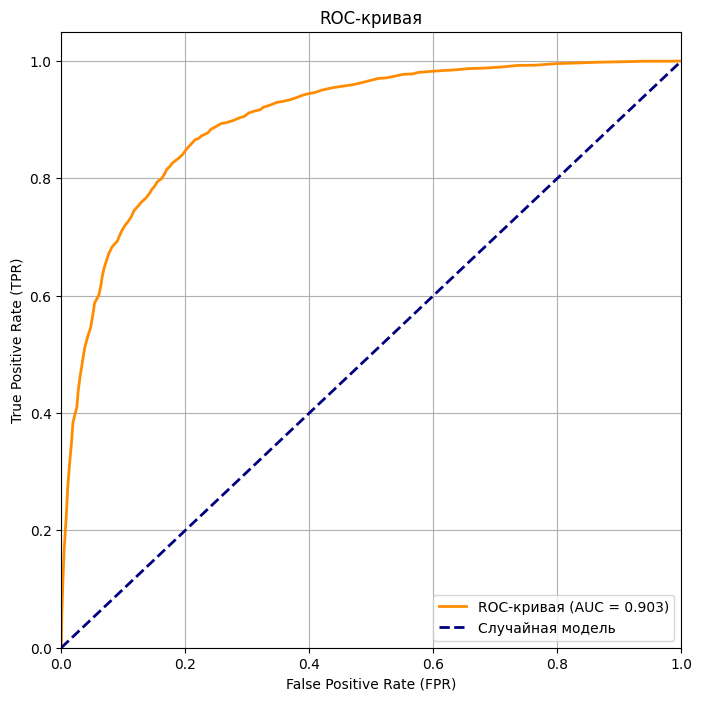

In [825]:
y_pred_proba = rf_gini_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC-кривая (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайная модель')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [826]:
accuracy_score(y_test, y_pred)

0.8315714029743774

In [827]:
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted_RF': y_pred,
    'MAE': np.abs(y_test - y_pred),
})
results.to_csv('depression_predictions.csv', index=False)
results.head()

,Actual,Predicted_RF,MAE
19981,0,0,0
16551,0,0,0
7640,0,0,0
21266,1,1,0
15759,1,0,1


In [828]:
mean_absolute_error(y_test, y_pred)

0.16842859702562266

In [829]:
grades_df = pd.read_csv("../datasets/data.csv")
cols_to_drop = ['Grades']
X = grades_df.drop(cols_to_drop, axis=1)  # Удаляем таргет
y = grades_df['Grades']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

In [830]:
def print_metrics(y_true, y_pred, model_name):
    print(f'{model_name}:')
    print(f'R2: {r2_score(y_true, y_pred):.4f}')
    print(f'MAE: {mean_absolute_error(y_true, y_pred):.4f}')
    print(f'MSE: {mean_squared_error(y_true, y_pred):.4f}\n')

print_metrics(y_test, y_pred_rf, 'Случайный лес')


Случайный лес:
R2: 0.9811
MAE: 0.8973
MSE: 1.4295

